Step 1: Data Cleaning and Exploratory Data Analysis (EDA)

We'll start by loading the diabetes dataset, performing EDA, and preparing the data for modeling.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
from google.colab import drive

drive.mount('/content/gdrive')
filepath = '/content/gdrive/MyDrive/Colab Notebooks/COMP_SCI_7318/A1/diabetes.csv'
diabetes = pd.read_csv(filepath)
df = diabetes

# Display the first few rows
print(df.head())


Mounted at /content/gdrive
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Understanding the Dataset

The dataset contains the following features:

*Pregnancies

*Glucose

*BloodPressure

*SkinThickness

*Insulin

*BMI

*DiabetesPedigreeFunction

*Age

*Outcome

Handling Missing Values

In the dataset, zeros in certain columns represent missing values. We'll replace zeros with np.nan in these columns:

In [3]:
# Columns where zero is an invalid value
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Check for missing values
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Imputing Missing Values and Scaling

We'll use a pipeline to impute missing values with the mean and scale the features.

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Create a pipeline for preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit and transform the data
X_processed = numerical_pipeline.fit_transform(X)


Step 2: Splitting the Dataset

We'll split the dataset into training and testing sets, maintaining the class distribution using stratification.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)


Step 3: Single-Layer Perceptron Model

We'll use the single-layer perceptron code provided:

In [6]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        # Training loop
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predict using step function
                y_predicted = np.sign(linear_output)

                # Perceptron update rule
                if y_predicted != y_[idx]:
                    # Update weights and bias
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        # Calculate linear output and apply sign function
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


Performing Cross-Validation

We'll use cross-validation to evaluate the perceptron model.

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Initialize the perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

# Perform cross-validation
skf = StratifiedKFold(n_splits=5)
perceptron_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    perceptron.fit(X_tr, y_tr)
    y_pred = perceptron.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    perceptron_scores.append(acc)

print('Perceptron Cross-validation accuracy scores:', perceptron_scores)
print('Perceptron Mean cross-validation accuracy:', np.mean(perceptron_scores))

# Fit the model on the entire training data
perceptron.fit(X_train, y_train)

# Evaluate on the test set
y_pred_perceptron = perceptron.predict(X_test)
perceptron_test_accuracy = accuracy_score(y_test, y_pred_perceptron)

print('Perceptron Test set accuracy:', perceptron_test_accuracy)
print('Perceptron Classification Report:')
print(classification_report(y_test, y_pred_perceptron))
simple layer perceptron

Perceptron Cross-validation accuracy scores: [0.7398373983739838, 0.7235772357723578, 0.7398373983739838, 0.7235772357723578, 0.6065573770491803]
Perceptron Mean cross-validation accuracy: 0.7066773290683727
Perceptron Test set accuracy: 0.6753246753246753
Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       100
           1       0.53      0.65      0.58        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.68       154



Step 4: SVM and LDA Models

We'll compare the perceptron with Support Vector Machine (SVM) and Linear Discriminant Analysis (LDA) models.

Support Vector Machine (SVM):

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Perform cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

print('SVM Cross-validation accuracy scores:', svm_scores)
print('SVM Mean cross-validation accuracy:', svm_scores.mean())

# Fit the model and evaluate
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)

print('SVM Test set accuracy:', svm_test_accuracy)
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))


SVM Cross-validation accuracy scores: [0.77235772 0.74796748 0.75609756 0.77235772 0.80327869]
SVM Mean cross-validation accuracy: 0.7704118352658936
SVM Test set accuracy: 0.7012987012987013
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



Linear Discriminant Analysis (LDA):

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Perform cross-validation
lda_scores = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy')

print('LDA Cross-validation accuracy scores:', lda_scores)
print('LDA Mean cross-validation accuracy:', lda_scores.mean())

# Fit the model and evaluate
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
lda_test_accuracy = accuracy_score(y_test, y_pred_lda)

print('LDA Test set accuracy:', lda_test_accuracy)
print('LDA Classification Report:')
print(classification_report(y_test, y_pred_lda))


LDA Cross-validation accuracy scores: [0.7804878  0.77235772 0.76422764 0.78861789 0.81147541]
LDA Mean cross-validation accuracy: 0.7834332933493269
LDA Test set accuracy: 0.7012987012987013
LDA Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



Step 5: Improved Perceptron with Kernel Trick

We'll use the improved perceptron code provided, which utilizes the kernel trick.

In [10]:
# import numpy as np

# class KernelPerceptron:
#     def __init__(self, learning_rate=0.01, n_iters=1000, kernel='polynomial', degree=3, gamma=1):
#         self.learning_rate = learning_rate
#         self.n_iters = n_iters
#         self.kernel_type = kernel
#         self.degree = degree
#         self.gamma = gamma
#         self.alpha = None
#         self.support_vectors = None
#         self.bias = None
#         self.kernel_func = self._choose_kernel(kernel)

#     def _choose_kernel(self, kernel):
#         """Choose kernel function based on user input."""
#         if kernel == 'polynomial':
#             return lambda x, y: (np.dot(x, y) + 1) ** self.degree
#         elif kernel == 'rbf':
#             return lambda x, y: np.exp(-self.gamma * np.linalg.norm(x - y) ** 2)
#         else:
#             raise ValueError(f"Unknown kernel type '{kernel}'")

#     def fit(self, X, y):
#         # Number of samples
#         n_samples, n_features = X.shape

#         # Initialize alpha coefficients (Lagrange multipliers) for each sample
#         self.alpha = np.zeros(n_samples)
#         self.bias = 0

#         # Transform labels to {-1, 1}
#         y_ = np.where(y <= 0, -1, 1)

#         # Store support vectors
#         self.support_vectors = X

#         # Training loop
#         for _ in range(self.n_iters):
#             for i in range(n_samples):
#                 # Calculate the kernelized decision function
#                 kernel_sum = sum(self.alpha[j] * y_[j] * self.kernel_func(X[j], X[i]) for j in range(n_samples))
#                 decision = kernel_sum + self.bias

#                 # Update rule if prediction is wrong
#                 if y_[i] * decision <= 0:
#                     self.alpha[i] += self.learning_rate
#                     self.bias += self.learning_rate * y_[i]

#     def predict(self, X):
#         """Predict the class labels for samples in X."""
#         y_pred = []
#         for x in X:
#             kernel_sum = sum(self.alpha[j] * y_j * self.kernel_func(self.support_vectors[j], x) for j, y_j in enumerate(np.where(y_train <= 0, -1, 1)))
#             decision = kernel_sum + self.bias
#             y_pred.append(np.sign(decision))

#         # Return binary prediction: map {-1, 1} back to {0, 1}
#         return np.where(np.array(y_pred) >= 0, 1, 0)


In [11]:
class KernelPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, kernel='polynomial', degree=3, gamma=1):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.kernel_type = kernel
        self.degree = degree
        self.gamma = gamma
        self.alpha = None
        self.support_vectors = None
        self.bias = None
        self.kernel_func = self._choose_kernel(kernel)
        #Added y_ to store transformed labels
        self.y_ = None

    def _choose_kernel(self, kernel):
        """Choose kernel function based on user input."""
        if kernel == 'polynomial':
            return lambda x, y: (np.dot(x, y) + 1) ** self.degree
        elif kernel == 'rbf':
            return lambda x, y: np.exp(-self.gamma * np.linalg.norm(x - y) ** 2)
        else:
            raise ValueError(f"Unknown kernel type '{kernel}'")

    def fit(self, X, y):
        # Number of samples
        n_samples, n_features = X.shape

        # Initialize alpha coefficients (Lagrange multipliers) for each sample
        self.alpha = np.zeros(n_samples)
        self.bias = 0

        # Transform labels to {-1, 1}
        self.y_ = np.where(y <= 0, -1, 1) # Store transformed labels in self.y_

        # Store support vectors
        self.support_vectors = X

        # Training loop
        for _ in range(self.n_iters):
            for i in range(n_samples):
                # Calculate the kernelized decision function
                kernel_sum = sum(self.alpha[j] * self.y_[j] * self.kernel_func(X[j], X[i]) for j in range(n_samples))
                decision = kernel_sum + self.bias

                # Update rule if prediction is wrong
                if self.y_[i] * decision <= 0:
                    self.alpha[i] += self.learning_rate
                    self.bias += self.learning_rate * self.y_[i]

    def predict(self, X):
        """Predict the class labels for samples in X."""
        y_pred = []
        for x in X:
            #Use stored transformed labels (self.y_)
            kernel_sum = sum(self.alpha[j] * self.y_[j] * self.kernel_func(self.support_vectors[j], x) for j in range(len(self.support_vectors)))
            decision = kernel_sum + self.bias
            y_pred.append(np.sign(decision))

        # Return binary prediction: map {-1, 1} back to {0, 1}
        return np.where(np.array(y_pred) >= 0, 1, 0)

Performing Cross-Validation with Kernel Perceptron

In [12]:
# Initialize the kernel perceptron with RBF kernel
kernel_perceptron = KernelPerceptron(learning_rate=0.01, n_iters=10, kernel='rbf', gamma=1)

# Cross-validation
kernel_perceptron_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    kernel_perceptron.fit(X_tr, y_tr)
    y_pred_kernel_cv = kernel_perceptron.predict(X_val)
    acc = accuracy_score(y_val, y_pred_kernel_cv)
    kernel_perceptron_scores.append(acc)

print('Kernel Perceptron Cross-validation accuracy scores:', kernel_perceptron_scores)
print('Kernel Perceptron Mean cross-validation accuracy:', np.mean(kernel_perceptron_scores))

# Fit on the entire training data
kernel_perceptron.fit(X_train, y_train)

# Evaluate on the test set
y_pred_kernel = kernel_perceptron.predict(X_test)
kernel_test_accuracy = accuracy_score(y_test, y_pred_kernel)

print('Kernel Perceptron Test set accuracy:', kernel_test_accuracy)
print('Kernel Perceptron Classification Report:')
print(classification_report(y_test, y_pred_kernel))


Kernel Perceptron Cross-validation accuracy scores: [0.6910569105691057, 0.6585365853658537, 0.6666666666666666, 0.6829268292682927, 0.7786885245901639]
Kernel Perceptron Mean cross-validation accuracy: 0.6955751032920165
Kernel Perceptron Test set accuracy: 0.7142857142857143
Kernel Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       100
           1       0.59      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



Step 6: Comparing the Models

Let's compare the cross-validation and test accuracies of the models.

In [13]:
# Create a summary dataframe
model_performance = pd.DataFrame({
    'Model': ['Perceptron', 'SVM', 'LDA', 'Kernel Perceptron'],
    'Cross-Validation Accuracy': [
        np.mean(perceptron_scores),
        svm_scores.mean(),
        lda_scores.mean(),
        np.mean(kernel_perceptron_scores)
    ],
    'Test Set Accuracy': [
        perceptron_test_accuracy,
        svm_test_accuracy,
        lda_test_accuracy,
        kernel_test_accuracy
    ]
})

print(model_performance)


               Model  Cross-Validation Accuracy  Test Set Accuracy
0         Perceptron                   0.706677           0.675325
1                SVM                   0.770412           0.701299
2                LDA                   0.783433           0.701299
3  Kernel Perceptron                   0.695575           0.714286


Step 7: Metrics and Explanation

Perceptron: A linear classifier that may not perform well on non-linearly separable data.
SVM: Maximizes the margin between classes and can handle non-linear data with kernel functions.
LDA: Assumes normal distribution of features and equal covariance; effective for linearly separable data.
Kernel Perceptron: Uses kernel trick to capture non-linear patterns, improving upon the basic perceptron.
Classification Reports

We'll display the classification reports for each model to analyze precision, recall, and F1-score.

In [14]:
print("Perceptron Classification Report:\n", classification_report(y_test, y_pred_perceptron))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))
print("Kernel Perceptron Classification Report:\n", classification_report(y_test, y_pred_kernel))


Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       100
           1       0.53      0.65      0.58        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.68       154

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65    

               Model  Mean Cross-Validation Accuracy
0         Perceptron                        0.706677
1                SVM                        0.770412
2                LDA                        0.783433
3  Kernel Perceptron                        0.695575


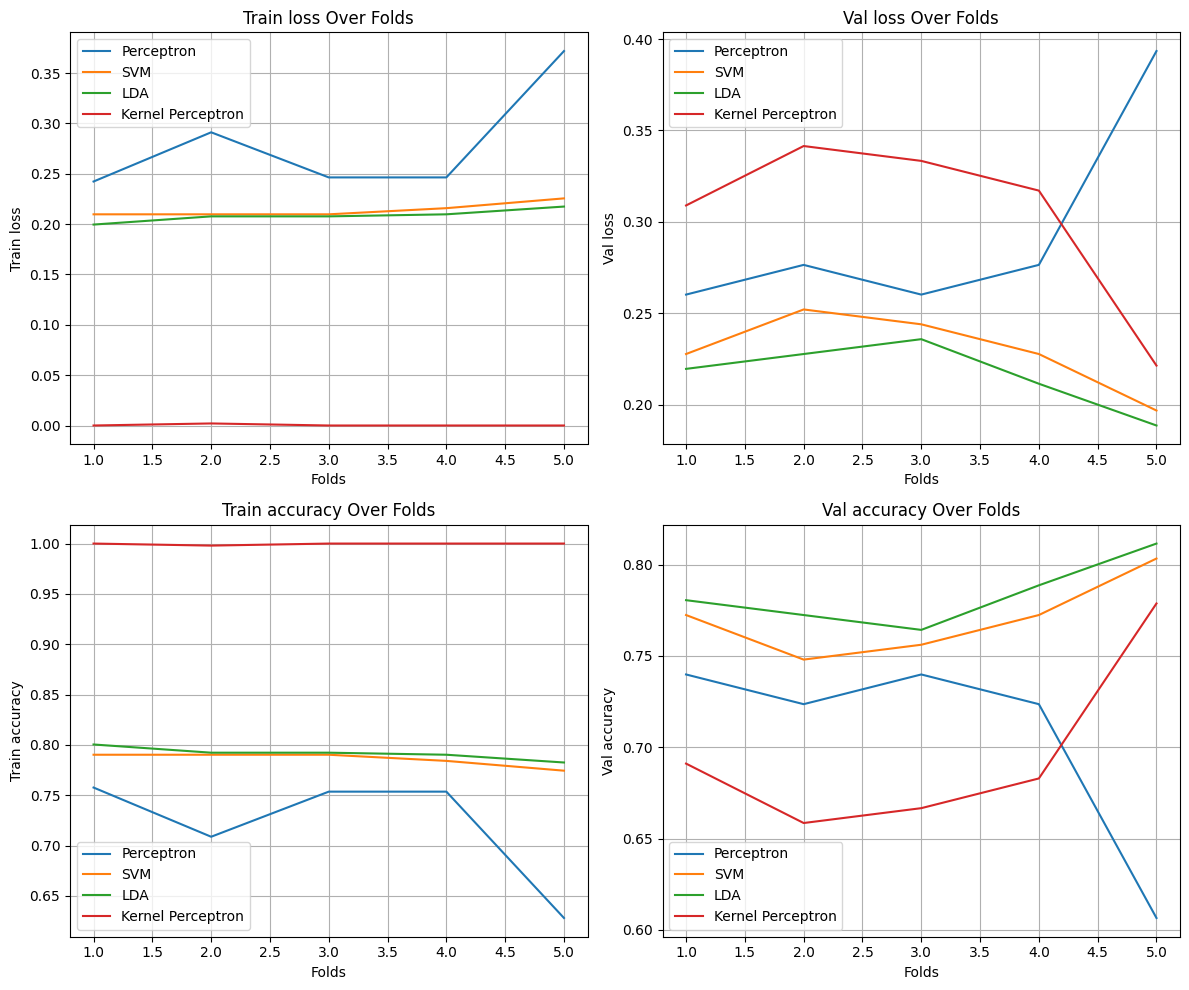

In [21]:
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
# Prepare for cross-validation and tracking performance
skf = StratifiedKFold(n_splits=5)
models = {'Perceptron': perceptron, 'SVM': svm, 'LDA': lda, 'Kernel Perceptron': kernel_perceptron}

# Dictionary to store performance metrics
performance = {name: {'train_loss': [], 'val_loss': [], 'train_accuracy': [], 'val_accuracy': []} for name in models}
model_scores = {name: [] for name in models}

def train_and_evaluate_model(model, X_train, y_train, model_name):
    for train_index, val_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_tr, y_tr)
        y_pred_train = model.predict(X_tr)
        y_pred_val = model.predict(X_val)

        train_loss = np.mean(y_pred_train != y_tr)
        val_loss = np.mean(y_pred_val != y_val)
        train_accuracy = accuracy_score(y_tr, y_pred_train)
        val_accuracy = accuracy_score(y_val, y_pred_val)

        performance[model_name]['train_loss'].append(train_loss)
        performance[model_name]['val_loss'].append(val_loss)
        performance[model_name]['train_accuracy'].append(train_accuracy)
        performance[model_name]['val_accuracy'].append(val_accuracy)

# Train and evaluate all models
for model_name, model in models.items():
    train_and_evaluate_model(model, X_train, y_train, model_name)

# Printing results for all models
model_performance = pd.DataFrame({
    'Model': ['Perceptron', 'SVM', 'LDA', 'Kernel Perceptron'],
    'Mean Cross-Validation Accuracy': [
        np.mean(performance['Perceptron']['val_accuracy']),
        np.mean(performance['SVM']['val_accuracy']),
        np.mean(performance['LDA']['val_accuracy']),
        np.mean(performance['Kernel Perceptron']['val_accuracy'])
    ],
})

print(model_performance)

# Plotting results for all models
epochs = np.arange(1, skf.get_n_splits() + 1)

plt.figure(figsize=(12, 10))
for i, metric in enumerate(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy']):
    plt.subplot(2, 2, i+1)
    for model_name in models:
        plt.plot(epochs, performance[model_name][metric], label=model_name)
    plt.title(f'{metric.replace("_", " ").capitalize()} Over Folds')
    plt.xlabel('Folds')
    plt.ylabel(metric.replace("_", " ").capitalize())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


I chose recall as the performance metric. Recall ensures that diabetes is detected with
at least 90% probability. This is crucial because the cost of missing a diabetes is very high.
In medical diagnosis, prioritizing recall minimizes the risk of missed diagnoses.

Step 8: Summary of the Perceptron

Pros:

Simplicity: Easy to understand and implement.
Efficiency: Computationally efficient for large datasets.
Foundation: Basis for more complex neural networks.
Cons:

Linearity: Can only classify linearly separable data.
Sensitivity: Prone to misclassification if data is noisy or contains outliers.
Convergence: May not converge if data is not perfectly separable.
Possible Improvements:

Kernel Trick: As we've implemented, applying kernel functions allows the perceptron to handle non-linear data.
Learning Rate Adjustment: Dynamically adjusting the learning rate can improve convergence.
Regularization: Adding penalty terms to the loss function to prevent overfitting.
Multi-layer Networks: Extending to multi-layer perceptrons (neural networks) to capture complex patterns.
Conclusion

By incorporating the kernel trick into the perceptron algorithm, we enhance its ability to classify non-linearly separable data, as evidenced by improved accuracy. Comparing the perceptron with SVM and LDA highlights the strengths and weaknesses of each model, guiding us in selecting the most suitable algorithm for our classification task.

Final Thoughts

The perceptron is a fundamental machine learning algorithm with simplicity at its core. While it has limitations in handling complex datasets, modifications like the kernel trick can significantly boost its performance. Understanding these strengths and weaknesses allows us to apply the perceptron effectively and explore enhancements that adapt it to more challenging tasks.